In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [17]:
path="drive/MyDrive/ML/"
testing=path+'testing'
training=path+'training'
valid=path+'validation/'

In [5]:
img=image.load_img(training+"/happy/001.jpg")

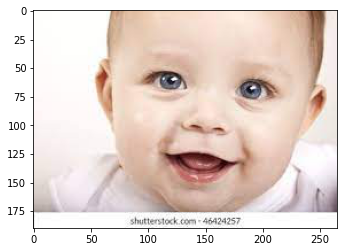

In [6]:
plt.imshow(img)

In [7]:
cv2.imread(training+"/happy/001.jpg")

array([[[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [233, 238, 247],
        [228, 233, 242],
        [232, 237, 246]],

       [[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [233, 238, 247],
        [229, 234, 243],
        [232, 237, 246]],

       [[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [232, 237, 246],
        [230, 235, 244],
        [232, 237, 246]],

       ...,

       [[114, 114, 114],
        [252, 252, 252],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[114, 114, 114],
        [252, 252, 252],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[114, 114, 114],
        [252, 252, 252],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
cv2.imread(training+"/happy/001.jpg").shape

(190, 265, 3)

In [9]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [19]:
train_dataset=train.flow_from_directory(training+'/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
# validation_dataset=validation.flow_from_directory(valid,
#                                        target_size=(200,200),
#                                        batch_size=3,
#                                        class_mode='binary')

Found 20 images belonging to 2 classes.


In [20]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [21]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [22]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
    
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 134ms/step - loss: 0.5110 - accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 0s 158ms/step - loss: 0.6185 - accuracy: 0.7778
Epoch 3/10
3/3 [==============================] - 0s 135ms/step - loss: 0.2000 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 158ms/step - loss: 0.5366 - accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 0s 149ms/step - loss: 0.1670 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 157ms/step - loss: 0.1788 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 150ms/step - loss: 0.3494 - accuracy: 0.7778
Epoch 8/10
3/3 [==============================] - 0s 147ms/step - loss: 0.1663 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 150ms/step - loss: 0.3732 - accuracy: 0.8750
Epoch 10/10
3/3 [==============================] - 0s 155ms/step - loss: 0.1556 - accuracy: 0.8750


drive/MyDrive/ML/testing


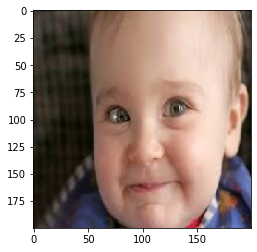

you are sad


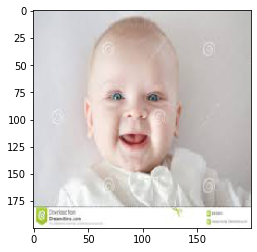

you are happy


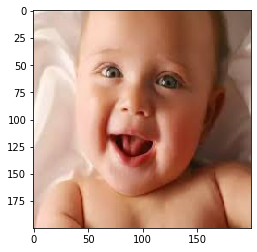

you are sad


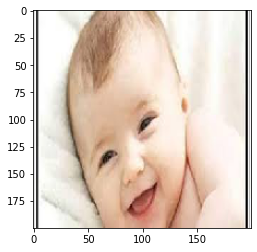

you are happy


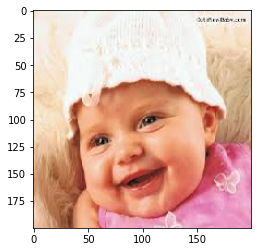

you are sad


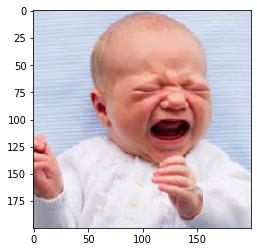

you are sad


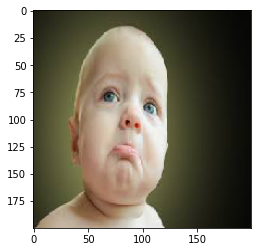

you are sad


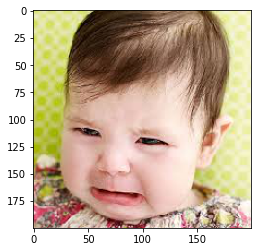

you are sad


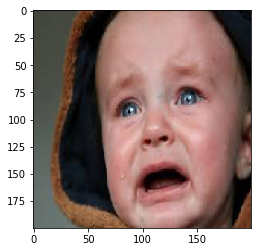

you are sad


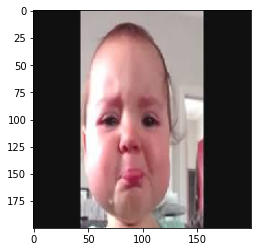

you are sad


In [26]:
dir_path=testing
print(dir_path)
for i in os.listdir(dir_path):
    for j in os.listdir(dir_path+'/'+i):
#         print(j)
        img=image.load_img(dir_path+'/'+i+'/'+j,target_size=(200,200,3))
        plt.imshow(img)
        plt.show()
        
        X=image.img_to_array(img)
        X=np.expand_dims(X,axis=0)
        images=np.vstack([X])
        val=model.predict(images)
        if(val==0):
            print("you are happy")
        else:
            print("you are sad")